In [1]:
import sqlite3
conn = sqlite3.connect("myData.db")
conn.close()


In [2]:
import sqlite3
conn = sqlite3.connect("myInfo.db")     # 資料庫連線
sql = '''Create table students(  
        id int,
        name text,
        gender text)'''
conn.execute(sql)                       # 執行SQL指令
conn.close()                            # 關閉資料庫連線

In [5]:
import sqlite3
conn = sqlite3.connect("myInfo2.db")    # 資料庫連線
sql = '''Create table student2(  
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        gender TEXT)'''
conn.execute(sql)                       # 執行SQL指令
conn.close()                            # 關閉資料庫連線

In [3]:
import sqlite3
conn = sqlite3.connect("myInfo.db")     # 資料庫連線
print("請輸入myInfo資料庫students表單資料")
while True:
    new_id = int(input("請輸入id : "))  # 轉成整數
    new_name = input("請輸入name : ")
    new_gender = input("請輸入gender : ")
    x = (new_id, new_name, new_gender)
    sql = '''insert into students values(?,?,?)'''  
    conn.execute(sql,x)
    conn.commit()                       # 更新資料庫
    again = input("繼續(y/n)? ")
    if again[0].lower() == "n":
        break
conn.close()                            # 關閉資料庫連線


請輸入myInfo資料庫students表單資料
請輸入id : 1
請輸入name : aaa
請輸入gender : M
繼續(y/n)? y
請輸入id : 2
請輸入name : bbb
請輸入gender : F
繼續(y/n)? n


In [6]:
import sqlite3
conn = sqlite3.connect("myInfo2.db")     # 資料庫連線
print("請輸入myInfo資料庫student2表單資料")
while True:
    n_name = input("請輸入name : ")
    n_gender = input("請輸入gender : ")
    x = (n_name, n_gender)
    sql = '''insert into student2(name, gender) values(?,?)'''  
    conn.execute(sql,x)
    conn.commit()                       # 更新資料庫
    again = input("繼續(y/n)? ")
    if again[0].lower() == "n":
        break
conn.close()                            # 關閉資料庫連線

請輸入myInfo資料庫student2表單資料
請輸入name : ccc
請輸入gender : M
繼續(y/n)? y
請輸入name : ddd
請輸入gender : F
繼續(y/n)? n


In [8]:
import sqlite3
conn = sqlite3.connect("myInfo.db")     # 資料庫連線
results = conn.execute("SELECT * from students where id==1")
for record in results:
    print("id = ", record[0])
    print("name = ", record[1])
    print("gender = ", record[2])
conn.close()                            # 關閉資料庫連線


id =  1
name =  aaa
gender =  M


In [9]:
import sqlite3
import csv
import matplotlib.pyplot as plt

conn = sqlite3.connect("populations.db")    # 資料庫連線
sql = '''Create table population( 
        area TEXT,
        male int,                     
        female int,
        total int)'''
conn.execute(sql)                           # 執行SQL指令

fn = 'Taipei_Population.csv'
with open(fn) as csvFile:                   # 儲存在SQLite
    csvReader = csv.reader(csvFile)
    listCsv = list(csvReader)               # 轉成串列
    csvData = listCsv[4:]                   # 切片刪除前4 rows
    for row in csvData:
        area = row[0]                       # 區名稱
        male = int(row[7])                  # 男性人數
        female = int(row[8])                # 女性人數
        total = int(row[6])                 # 總人數
        x = (area, male, female, total)
        sql = '''insert into population values(?,?,?,?)'''
        conn.execute(sql,x)
        conn.commit()

results = conn.execute("SELECT * from population")
for record in results:
    print("區域       = ", record[0])
    print("男性人口數 = ", record[1])
    print("女性人口數 = ", record[2])
    print("總計人口數 = ", record[3])
       
conn.close()                                # 關閉資料庫連線

區域       =    松山區 
男性人口數 =  96357
女性人口數 =  109276
總計人口數 =  205633
區域       =    信義區 
男性人口數 =  106330
女性人口數 =  116783
總計人口數 =  223113
區域       =    大安區 
男性人口數 =  143905
女性人口數 =  164781
總計人口數 =  308686
區域       =    中山區 
男性人口數 =  106562
女性人口數 =  122747
總計人口數 =  229309
區域       =    中正區 
男性人口數 =  75840
女性人口數 =  83063
總計人口數 =  158903
區域       =    大同區 
男性人口數 =  62124
女性人口數 =  65527
總計人口數 =  127651
區域       =    萬華區 
男性人口數 =  92825
女性人口數 =  96562
總計人口數 =  189387
區域       =    文山區 
男性人口數 =  131114
女性人口數 =  142572
總計人口數 =  273686
區域       =    南港區 
男性人口數 =  59392
女性人口數 =  62184
總計人口數 =  121576
區域       =    內湖區 
男性人口數 =  137196
女性人口數 =  150246
總計人口數 =  287442
區域       =    士林區 
男性人口數 =  137965
女性人口數 =  148374
總計人口數 =  286339
區域       =    北投區 
男性人口數 =  122775
女性人口數 =  132408
總計人口數 =  255183


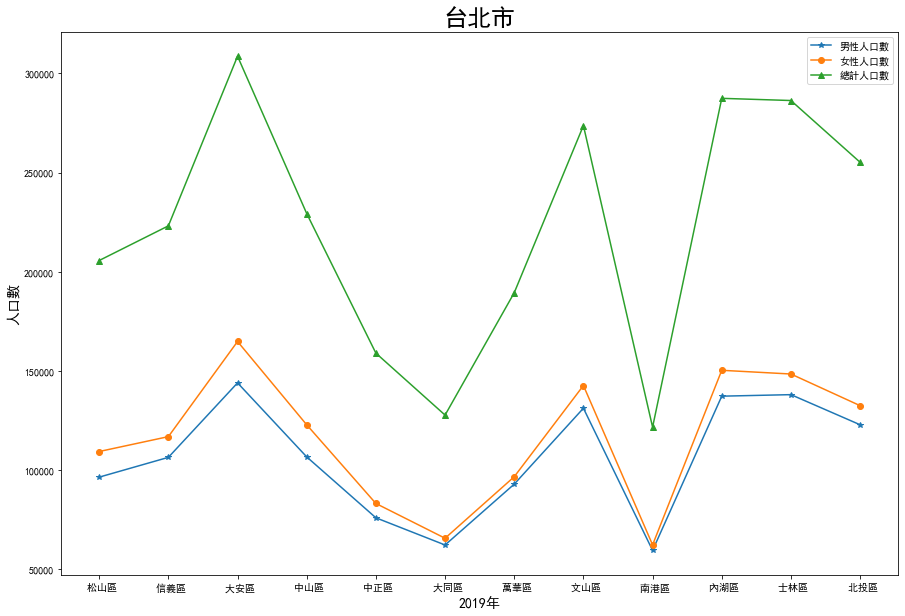

In [27]:
import sqlite3
import matplotlib.pyplot as plt
from pylab import mpl

conn = sqlite3.connect("populations.db")    # 資料庫連線
results = conn.execute("SELECT * from population")

area, male, female, total = [], [], [], []
for record in results:                      # 將人口資料放入串列
    area.append(record[0])
    male.append(record[1])
    female.append(record[2])
    total.append(record[3])       
conn.close()                                # 關閉資料庫連線
plt.figure(figsize=(15,10))
mpl.rcParams["font.sans-serif"] = ["SimHei"]        # 使用黑體
seq = area
linemale, = plt.plot(seq, male, '-*', label='男性人口數')
linefemale, = plt.plot(seq, female, '-o', label='女性人口數')
linetotal, = plt.plot(seq, total, '-^', label='總計人口數')


plt.legend(handles=[linemale, linefemale, linetotal], loc='best')

plt.title(u"台北市", fontsize=24)
plt.xlabel("2019年", fontsize=14)
plt.ylabel("人口數", fontsize=14)

plt.show()